### Analysis of Machine Learning Models on the Communities and Crime dataset

In this project , I have studied various machine learning models for classification of data on the Communities and Crime dataset.
The methods are listed below:  <br>
1) Linear Model using Least squares  <br>
2) Ridge Regression Model  <br>
3) Lasso Regression Model  <br>
4) Principal components regression (PCR) model  <br>
5) L-1 penalized Gradient boosting tree using XGBoost  <br>

The dataset used is Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. 
The attribute to be predicted is (Per Capita Violent Crimes). The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units. 


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploraroty Data Analysis

### The data set has missing values. Using data imputation technique to deal with the missing values in the data set.The data description mentions some features are non-predictive. Ignore those features.

#### Setting the non predictive columns- State, County, Community, Community Name, Fold as an object and importing the dataset

#### Marking Missing values in the dataset from ? to NaN

In [97]:
crime_data = pd.read_csv("crimedata.csv",na_values=['?'],dtype={'state':object,'county':object,'community':object,'communityname':object})
crime_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### Examining the Predictors and the Response Variable Per Capita Violent Crimes

#### We can see that most of the columns have minimum value of Zero which indicates a Missing value.

In [98]:
crime_data.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Imputing missing values in Non-predictive Categorical Variables (replacing them with Zero)

In [99]:
for col in ['state','county','community','communityname']:
    crime_data[col].fillna(0,inplace=True)

### Counting the number of missing values in the data in each column 

In [100]:
(crime_data.isnull().sum()).tail()

LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
dtype: int64


### Counting the number of missing values in the dataset

In [101]:
print("Missing values : ",crime_data.isnull().sum().sum())

Missing values :  36851


### Imputing the missing values with the mean value for each column using fillna()

In [102]:
crime_data.fillna(crime_data.mean(), inplace=True)

In [103]:
crime_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,0,0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,0,0,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,0,0,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


In [104]:
print("Missing values after Imputing : ",crime_data.isnull().sum().sum())

Missing values after Imputing :  0


### Splitting the Data into Train set and Test Set

In [105]:
crime_data=crime_data.drop(['state','county','community','communityname','fold'],axis=1)

In [107]:
train_set= crime_data.loc[0:1494,:]
test_set = crime_data.loc[1495:,:]


### Plotting a correlation matrix for the features in the data set

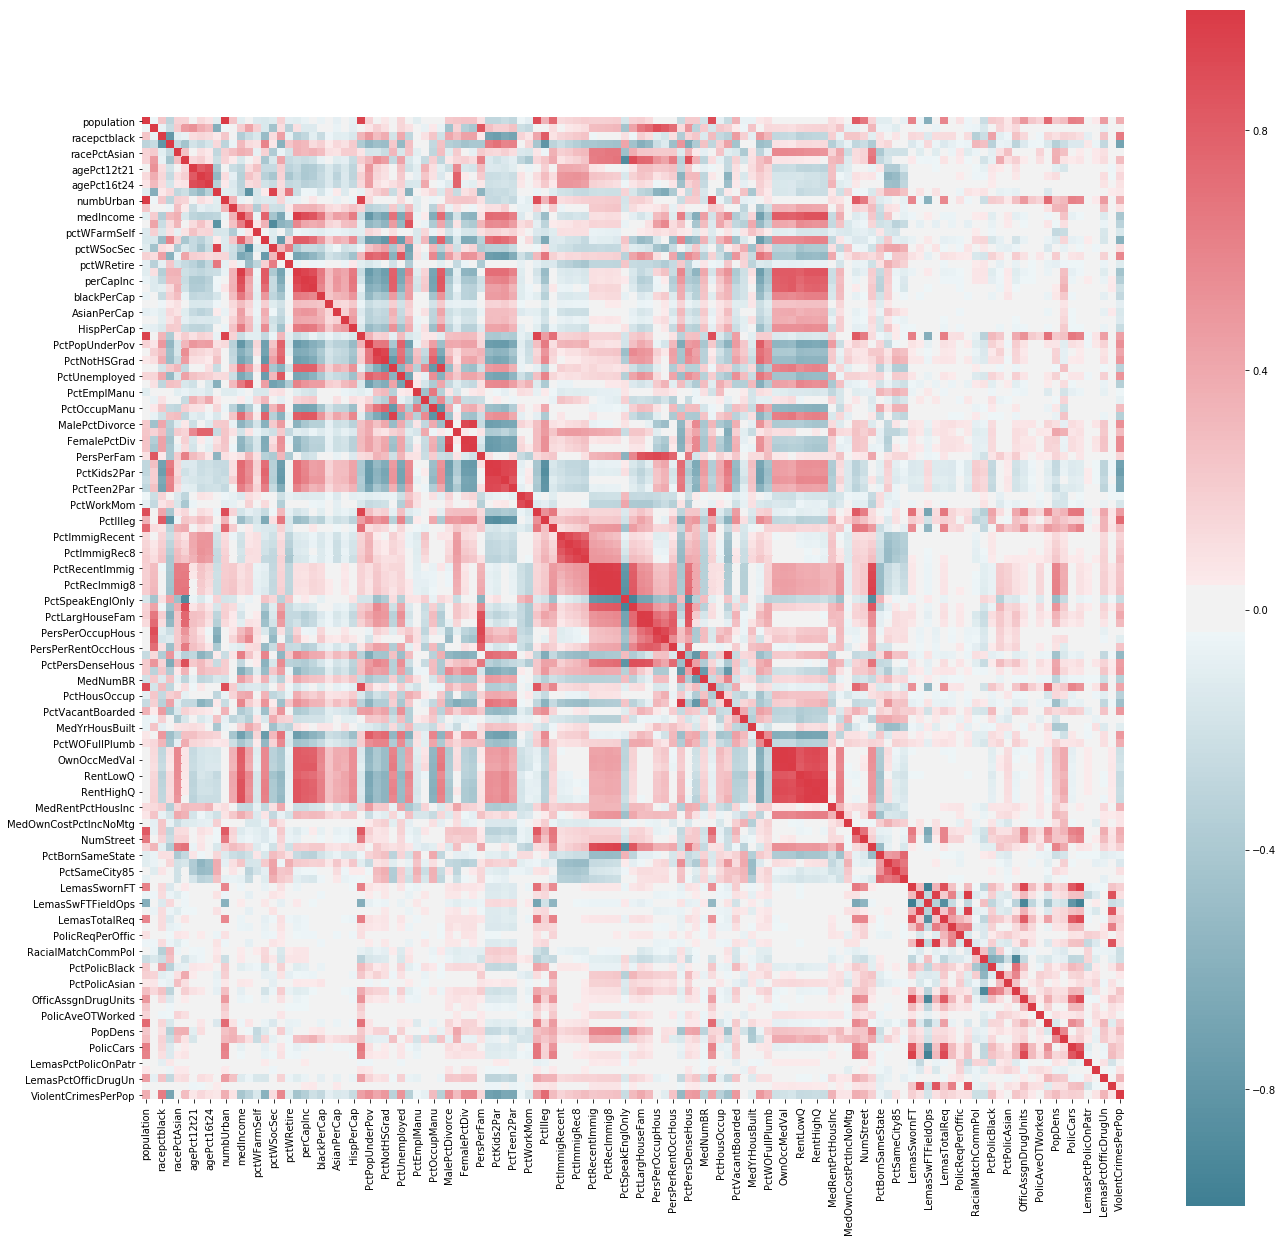

In [112]:
corr = train_set.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Calculating the Coefficient of Variation for each feature.

In [114]:
import scipy.stats as scistat
i=0
coef_var=scistat.variation(train_set)
for col in train_set.columns.tolist():
    print(col+" : ",coef_var[i])
    i=i+1

population :  2.240354965879167
householdsize :  0.3556805499866515
racepctblack :  1.4284074506092599
racePctWhite :  0.3301022059521686
racePctAsian :  1.3586450597327888
racePctHisp :  1.6115517541662485
agePct12t21 :  0.36895965939030007
agePct12t29 :  0.2912173646346084
agePct16t24 :  0.500142555817522
agePct65up :  0.4126379005920212
numbUrban :  2.037779618174568
pctUrban :  0.6431029790755587
medIncome :  0.5917801462174822
pctWWage :  0.328504134149932
pctWFarmSelf :  0.7016630853607426
pctWInvInc :  0.36521237682582114
pctWSocSec :  0.3605947857186363
pctWPubAsst :  0.7059696656048599
pctWRetire :  0.3453054120343088
medFamInc :  0.5404892966681873
perCapInc :  0.5578927727889998
whitePerCap :  0.5196545822676151
blackPerCap :  0.5991400633159216
indianPerCap :  0.8180943789334135
AsianPerCap :  0.6146598515430143
OtherPerCap :  0.6729918036796184
HispPerCap :  0.4839060277326521
NumUnderPov :  2.341659559375309
PctPopUnderPov :  0.7542176047790529
PctLess9thGrade :  0.680262

 #### Inference:  
 Some variables like racepctblack , racePctHisp , Population , NumImmig have co-efficients of variation higher than 1. From this we can interpret that the Standard deviation of those features is larger then their Mean value.

### We decide Pick root(128) features with highest CV , and make scatter plots and box plots for them to get a rough idea about the significance of the features.

### Square root of 128 is 11.31 so we will pick 11 features with highest CV

### ScatterPlots

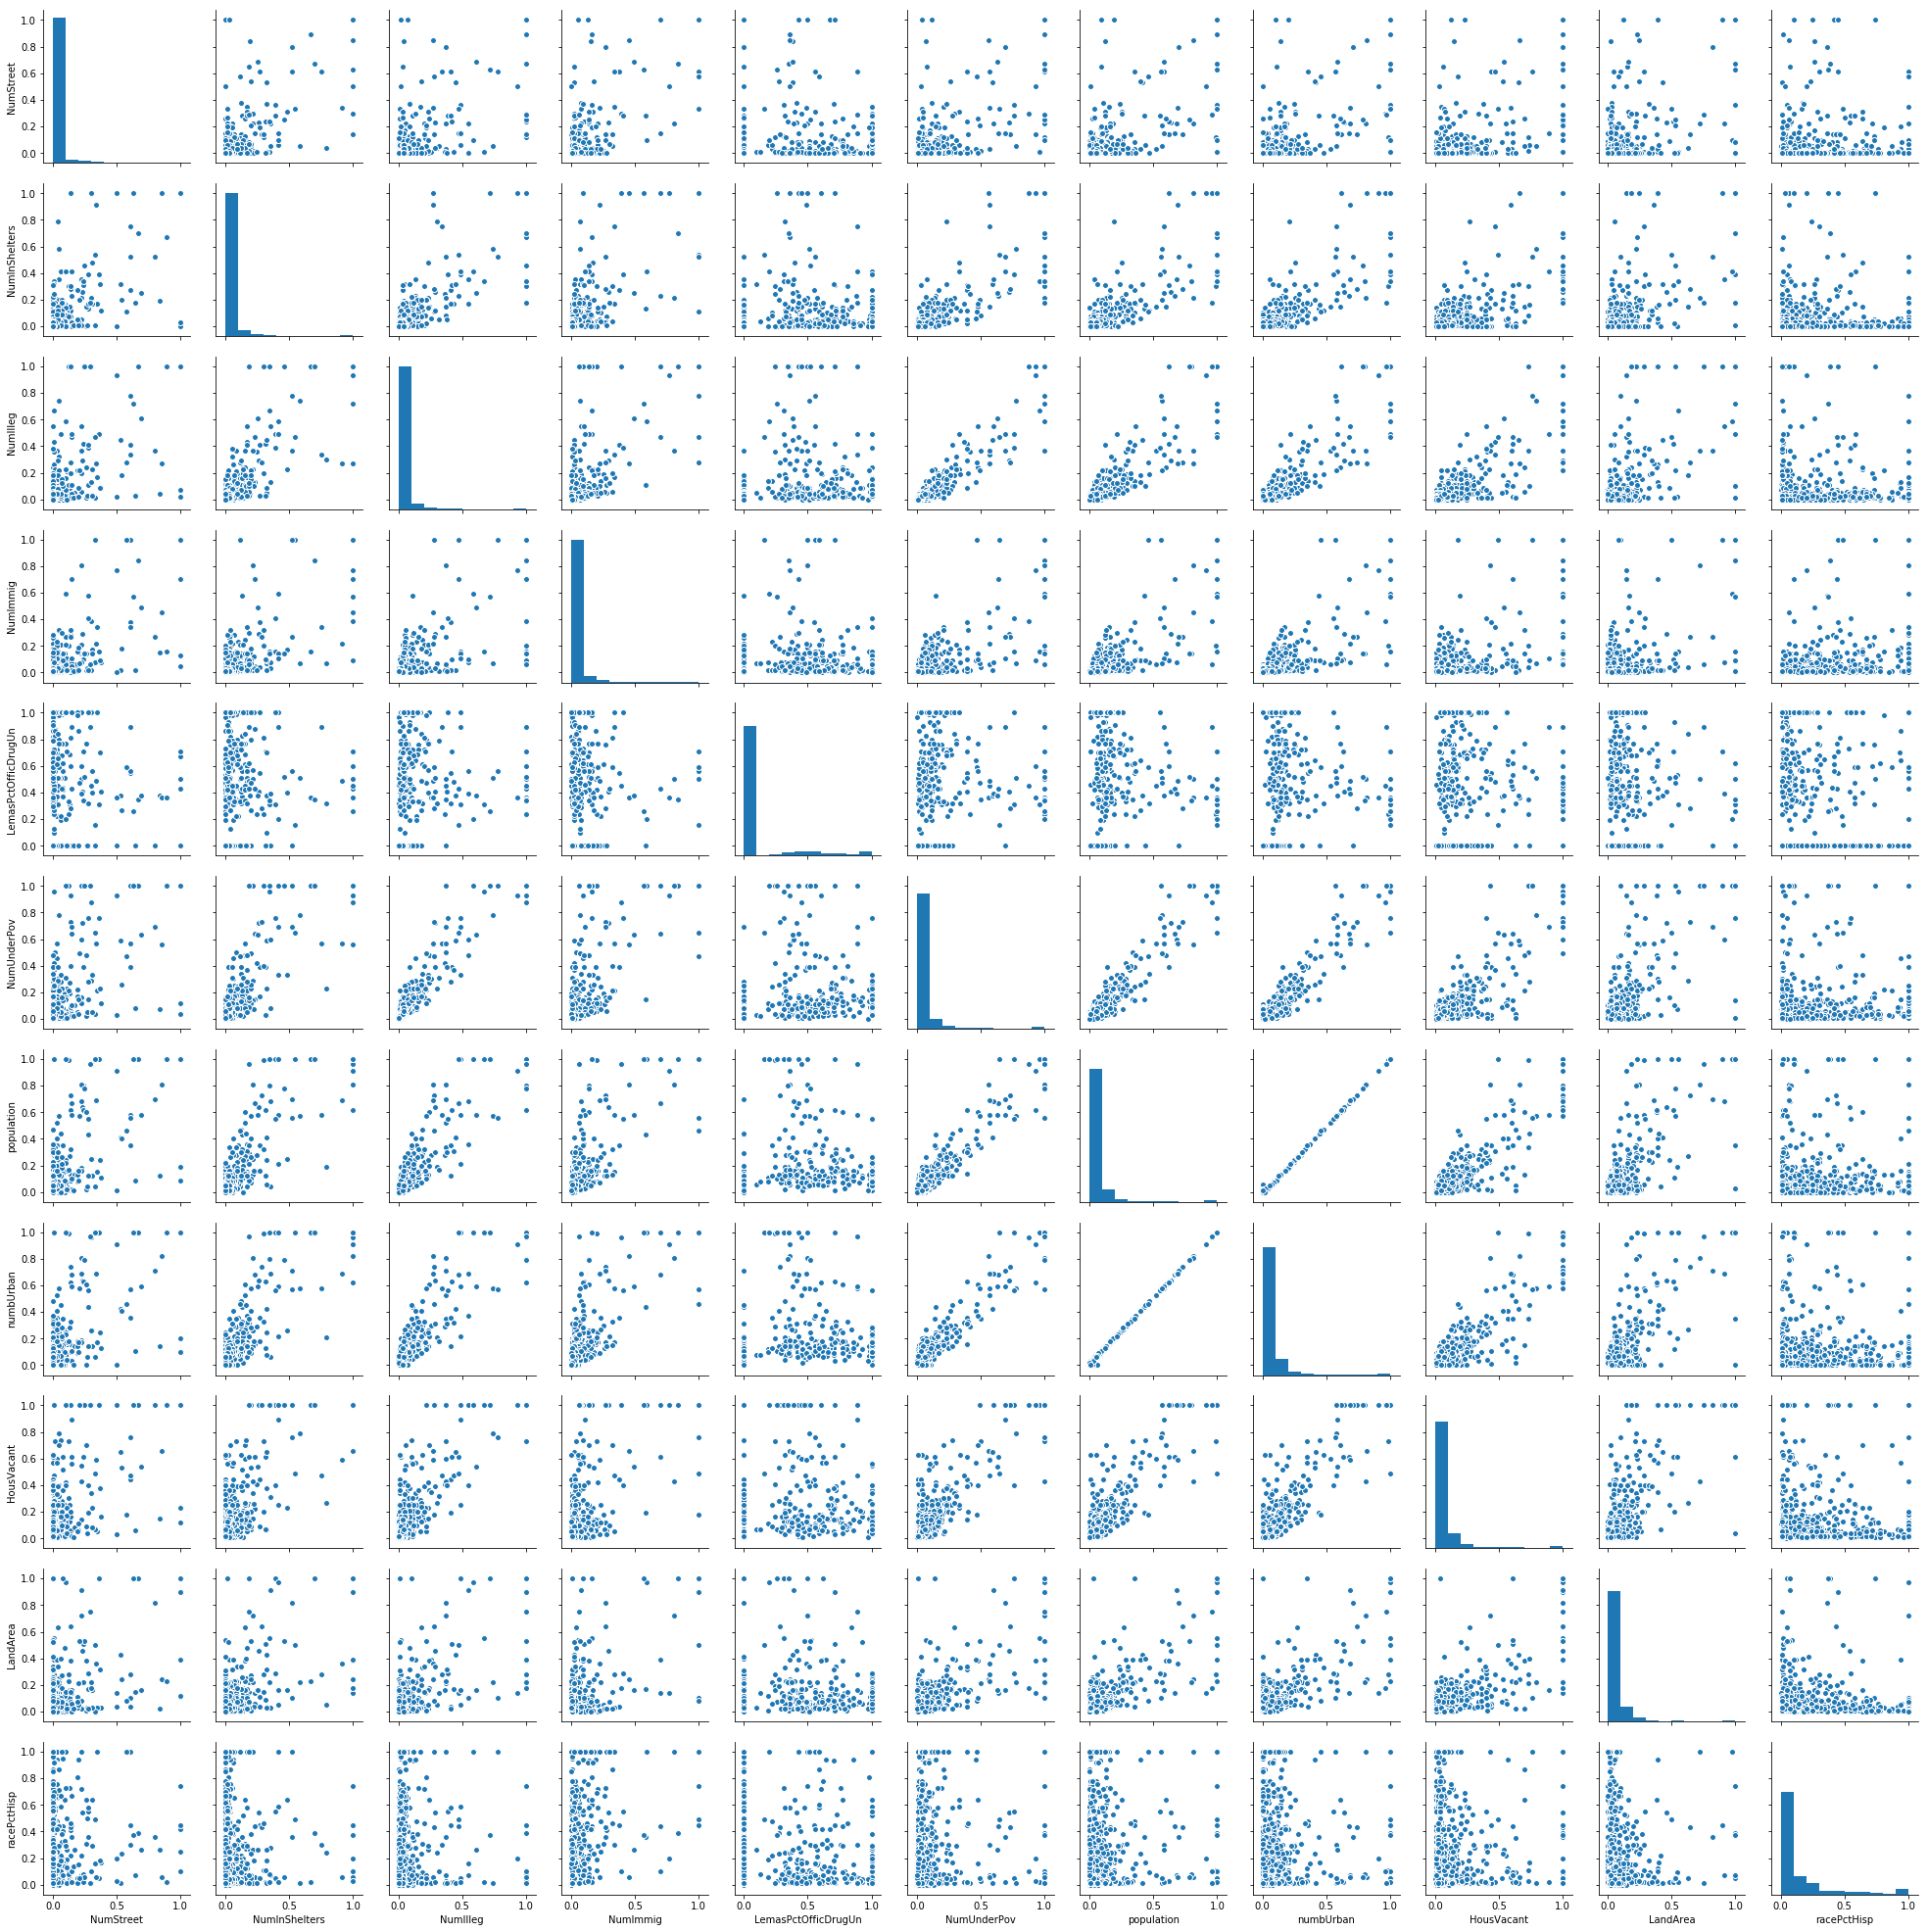

In [135]:
cv=coef_var.argsort()[::-1][:11]  
cols=train_set.columns[cv].tolist()
sns.pairplot(train_set[cols])

### Boxplots

In [173]:
plot_data=train_set[cols]
plot_data=np.array(plot_data)
col_1=cols[0:6]
pl1=plot_data[:,0:6]
col_2=cols[6:12]
pl2=plot_data[:,6:12]

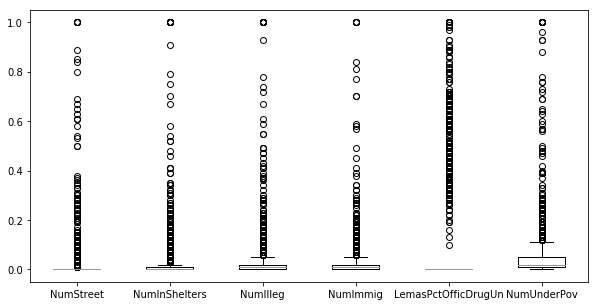

In [168]:
fig=plt.figure(1,figsize=(10, 5))
_=plt.boxplot(pl1,labels=col_1)

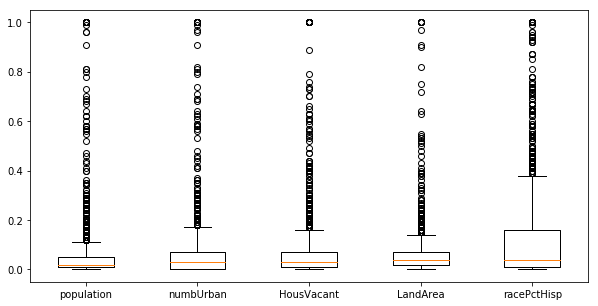

In [174]:
fig=plt.figure(1,figsize=(10, 5))
_=plt.boxplot(pl2,labels=col_2)

### Inference for 1(e) :

It is difficult to draw any concrete conclusions from the scatterplots about the significance of the variables.

But, we can see that 
1. The variables NumbUrban and Population are highly correlated and show positive correlation.
2. The features Population and NumUnderPov are also correlated.
3. The varibles NumIlleg and NumUnderPov are also correlated.
4. NumIlleg is also correlated to Population and NumbUrban.
5. Correlated features are mask the interactions between different features and cannot contribute much in improving the model prediction if the model is especially linear.


### Fit a linear model using least squares to the training set.

In [181]:
from sklearn.linear_model import LinearRegression as linear_reg
from sklearn.metrics import mean_squared_error as MSE

l_model=linear_reg()
X_train=train_set[train_set.columns[train_set.columns!='ViolentCrimesPerPop']]
y_train=train_set['ViolentCrimesPerPop']
X_test=test_set[test_set.columns[test_set.columns!='ViolentCrimesPerPop']]
y_test=test_set['ViolentCrimesPerPop']
l_model.fit(X_train,y_train)

y_pred=l_model.predict(X_test)
mean_squared_error = MSE(y_test,y_pred)
print("Mean squared error on Test set :",mean_squared_error)

Mean squared error on Test set : 0.7897255274314724


#### Linear Model : Mean squared error on Test set </b >: 0.7897255274314724

### Fit a ridge regression model on the training set, with λ chosen by cross-validation

In [182]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [227]:
lambdas = 10**np.linspace(10,-2,100)*0.5


In [206]:
#Using RidgeCV for 5-Fold Cross validation
ridge_model = RidgeCV(alphas=lambdas, fit_intercept=True, normalize=True,cv = 5)
ridge_model.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)
mse = MSE(y_test,y_pred)
print("Lambda value with least cv error ",ridge_model.alpha_)
print("Test set error for the chosen lambda value ",mse)

Lambda value with least cv error  0.06164233697210317
Test set error for the chosen lambda value  0.017522682424291315


### Ridge Regression
The <b> Test MS Error obtained is 0.0175 for Lambda=0.06.</b>
The Linear model Test Error was 0.789.

Hence,the Test MSE is lower when the model is run with best Lambda obtained from cross-validation.

### Fit a LASSO model on the training set, with λ chosen by cross-validation. Reporting the list of the variables selected by the model. 

#### Not needed to normalize the data Since the data is already normalized
#### Hence, running the LassoCV model with flag normalized=False

In [214]:
lasso_model = LassoCV(alphas=lambdas, normalize=False,cv = 5,random_state=23)
lasso_model.fit(X_train,y_train)

y_pred=lasso_model.predict(X_test)
mse = MSE(y_test,y_pred)
print("Lambda value with least cv error ",lasso_model.alpha_)
print("Test set error for the chosen lambda value ",mse)

Lambda value with least cv error  0.005
Test set error for the chosen lambda value  0.018805364920055027


In [215]:
cols = []
for i,coef in enumerate(lasso_model.coef_.tolist()):
    if coef != 0.0:
        cols.append(train_set.columns.tolist()[i])

#### Features Selected

In [216]:
cols

['racePctWhite',
 'pctUrban',
 'MalePctDivorce',
 'PctKids2Par',
 'PctIlleg',
 'PctPersDenseHous',
 'HousVacant',
 'PctVacantBoarded']

<b>Q 1(h) Inference: </b>
<br>
If the data was un-normalized then the number of features selected would be less as the model will fit better to the data. Though the MSE may or may not decrease.

### Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation

In [267]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [319]:
score=[]
tot_mse=[]
tot_score=[]
components=[1,2,5,8,10,12,15,18,20,25,30,40,50,60,70,80,85,90,95,100,120]

X=crime_data.drop('ViolentCrimesPerPop',axis=1)
Y=crime_data['ViolentCrimesPerPop']
X_train = X_train[0:1495]
Y_train = np.array(Y[0:1495])
for comp in components:
    pca = PCA(n_components=comp)
    X_scaled = pca.fit_transform(X_train)
    kf = KFold(n_splits=5)
    MSE1= []
  
    for train_index,val_index in kf.split(X_scaled):
        x_train, x_val = X_scaled[train_index.tolist()], X_scaled[val_index.tolist()]
        y_train, y_val = Y_train[train_index.tolist()], Y_train[val_index.tolist()]
        p_model=linear_reg()
        p_model = p_model.fit(x_train,y_train)
        y_pred = p_model.predict(x_val)
        mse = MSE(y_val, y_pred)
        MSE1.append(mse)

        
        scores = cross_val_score(p_model, x_val, y_val, cv=5)
        score.append(np.mean(scores))
        
    tot_mse.append(np.mean(MSE1))
    tot_score.append(np.mean(score))

In [320]:
pd.DataFrame({"Number of Components":components,"Validation MSE":tot_mse,"Score":tot_score})

,Number of Components,Validation MSE,Score
0,1,0.037911,0.294007
1,2,0.030607,0.361556
2,5,0.023057,0.430097
3,8,0.020130,0.477503
4,10,0.019997,0.505790
5,12,0.020046,0.523346
6,15,0.020024,0.535737
7,18,0.020141,0.544394
8,20,0.020217,0.550542
9,25,0.020047,0.554692


In [321]:
np.argmin(tot_mse)

17

#### PCR -Obtained lowest Validation Error=0.0194 for M=90 Components                        with Cross Validation


### Testing PCR on test set with M = 90 components

In [323]:
pca = PCA(n_components=90)
X_pca_red = pca.fit_transform(X)
X_pca_train=X_pca_red[0:1495]
X_pca_test=X_pca_red[1495:]
Y_train = Y[0:1495]
Y_test = Y[1495:]
p_model=linear_reg()
p_model = p_model.fit(x_train,y_train)
y_pred = p_model.predict(x_val)
mse = MSE(y_val, y_pred)
print("Test set error for M = 90 components ",mse)

Test set error for M = 90 components  0.017147945046733407


#### PCR- Test Set Error obtained for M=90 -> 0.0171

### L-1 penalized Gradient boosting tree using XGBoost
#### Determining α (the regularization term) using cross-validation.

In [394]:
from xgboost import XGBRegressor as XGBR
lambdas = [0.01, 0.05,0.07,0.08,0.09, 0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5, 10, 20, 50, 100, 200]
tot_mse=[]
score=[]
for lb in lambdas:
    kf = KFold(n_splits=5)
    MSE1= []
  
    for train_index,val_index in kf.split(X_train):
        x_train, x_val = X_scaled[train_index.tolist()], X_scaled[val_index.tolist()]
        y_train, y_val = Y_train[train_index.tolist()], Y_train[val_index.tolist()]
        boost_model = XGBR(random_state=0,silent=True,reg_alpha=lb)
        boost_model = boost_model.fit(x_train,y_train)
        y_pred = boost_model.predict(x_val)
        mse = MSE(y_val, y_pred)
        MSE1.append(mse)

        
    scores = cross_val_score(boost_model, x_val, y_val, cv=5)
    score.append(np.mean(scores))
        
    tot_mse.append(np.mean(MSE1))
    #tot_score.append(score)

In [403]:
pd.DataFrame({"L1 Penalty":lambdas,"Validation MSE":tot_mse,"Score":score})

,L1 Penalty,Validation MSE,Score
0,0.01,0.021977,0.472772
1,0.05,0.022319,0.496378
2,0.07,0.022152,0.465065
3,0.08,0.021937,0.473794
4,0.09,0.022015,0.471442
5,0.10,0.022031,0.471324
6,0.20,0.021776,0.470759
7,0.50,0.021767,0.480000
8,0.75,0.021807,0.460262
9,1.00,0.022313,0.471031


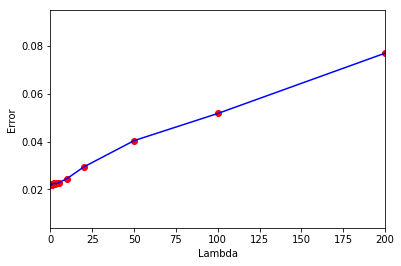

In [397]:

plt.figure()
plt.scatter(lambdas,tot_mse , color='red')
plt.plot(lambdas,tot_mse , color='blue')
plt.xlabel('Lambda')
plt.xlim([0.0, 200])
plt.ylabel('Error')

plt.show()


In [398]:
np.argmin(tot_mse)

7

#### XGBoost - Obtained lowest Validation Error for Regularization α = 0.5  with Cross Validation

### Testing XGBoost with α = 0.5 on Test Set

In [411]:
boost_model = XGBR(random_state=0,silent=True,reg_alpha=0.5)
boost_model = boost_model.fit(X_train,Y_train)
y_pred = boost_model.predict(X_test)
mse = MSE(Y_test, y_pred)
print("Mean square Error for Test Set : ",mse)

Mean square Error for Test Set :  0.0166442216770879


#### XGBoost - Test MSE = 0.0166 for Regularization α = 0.5  

In [412]:
errors = pd.DataFrame({"Model":['Linear Model','Ridge Regression','Lasso Model','PCR','XGBoost'],"Test MSE":[0.789,0.0175,0.0188,0.0171,0.0166]})
errors

,Model,Test MSE
0,Linear Model,0.7890
1,Ridge Regression,0.0175
2,Lasso Model,0.0188
3,PCR,0.0171
4,XGBoost,0.0166


### Obtained Least Test Error for XGBoost Model = 0.0166 than other models on the same data